**TRABALHO PRATICO 2** 

**Franci Rrapi (UFMG - 2021/1)**

**1) ROADMAPS ALGORITHM**

**IMPLEMENTATION and TESTS**

Below is the implementation of this algorithm and you can find also the image tests made (they are also saved and available in the same folder of the notebook)

In [1]:
try:
    import sim
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported. This means very probably that')
    print ('either "sim.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "sim.py"')
    print ('--------------------------------------------------------------')
    print ('')

import numpy as np

def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

import networkx as nx

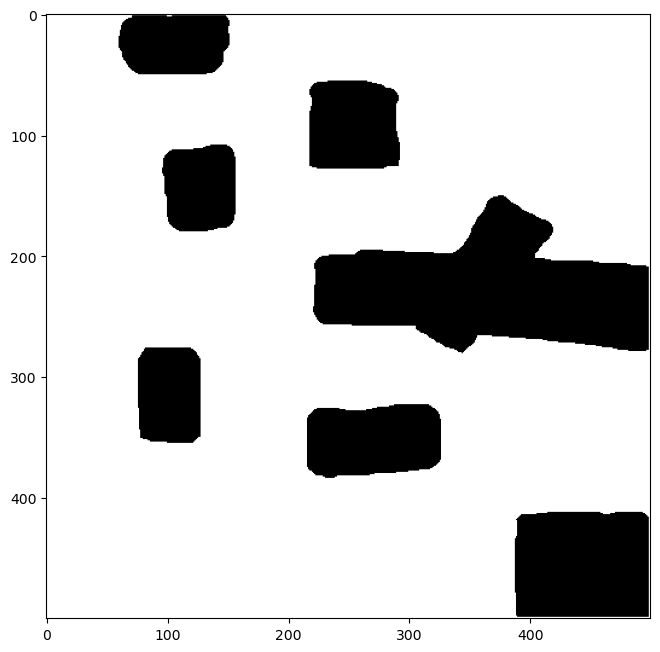

In [3]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Invertendo os valores para visualização (Branco - 0, Preto - 1)
img = mpimg.imread('img/cave2.png')
#img = 1 - mpimg.imread('img/maze.png')

#img = img[:, :, 0]

# Apenas para garantir que só teremos esses dois valores
threshold = 0.5
img[img > threshold] = 1
img[img<= threshold] = 0

ax.imshow(img, cmap='Greys', origin='upper')

Grid Decomposition

(500, 500)
[50 50]


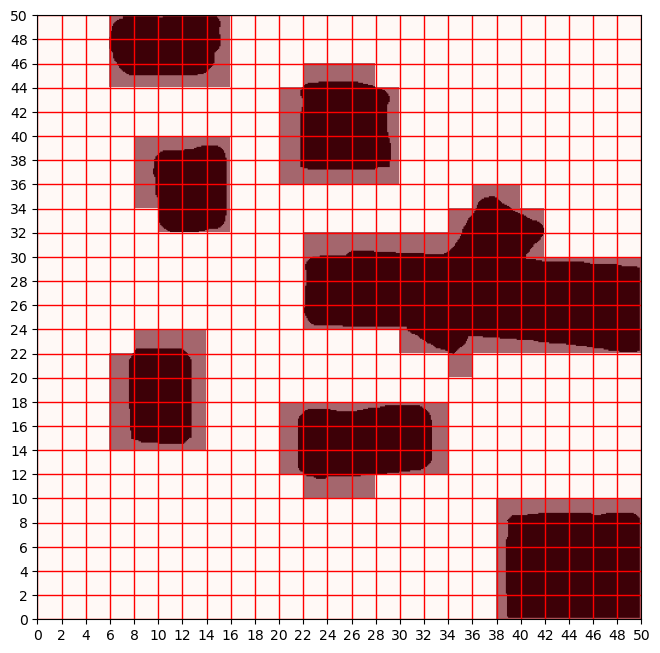

In [4]:
# Dimensões do mapa informado em metros (X, Y)
map_dims = np.array([50, 50]) # Cave 
#map_dims = np.array([22, 43])  # Maze

print(img.shape)
print(map_dims)

# Escala Pixel/Metro
sy, sx = img.shape / map_dims

# Tamanho da célula do nosso Grid (em metros)
cell_size = 2

rows, cols = (map_dims / cell_size).astype(int)
grid = np.zeros((rows, cols))

# Preenchendo o Grid
# Cada célula recebe o somatório dos valores dos Pixels
for r in range(rows):
    for c in range(cols):
        
        xi = int(c*cell_size*sx)
        xf = int(xi + cell_size*sx)
        
        yi = int(r*cell_size*sy)
        yf = int(yi + cell_size*sy)
                      
        grid[r, c] = np.sum(img[yi:yf,xi:xf])
        
# Binarizando as células como Ocupadas (1) ou Não-ocupadas (0)       
grid[grid > threshold] = 1
grid[grid<= threshold] = 0        

fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Plotando Mapa e Células
obj = ax.imshow(img, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]), origin='upper')
obj = ax.imshow(grid, cmap='Reds', extent=(0, map_dims[1], 0, map_dims[0]), alpha=.6)

# Plotando as linhas do grid para facilitar a visualização
ax.grid(which='major', axis='both', linestyle='-', color='r', linewidth=1)
ax.set_xticks(np.arange(0, map_dims[1]+1, cell_size))
ax.set_yticks(np.arange(0, map_dims[0]+1, cell_size))

Creating a Graph for our map

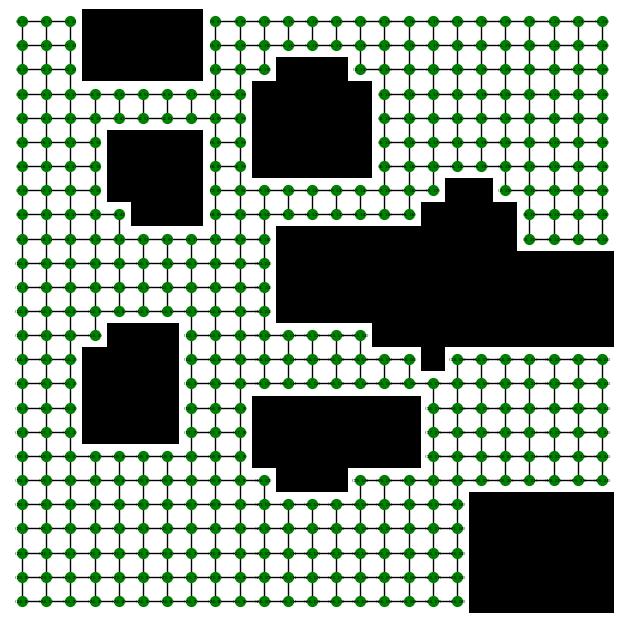

In [5]:
# Criando o Grafo para o nosso Grid

# Criando vértices em todas as células
G = nx.grid_2d_graph(rows, cols) 

# Removendo células que estão em células marcas com obstáculos
for r in range(rows):
    for c in range(cols):
        if grid[r][c] == 1:  
            G.remove_node((r,c))


fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Grid
obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]))

ax.grid(which='major', axis='both', linestyle='-', color='r', linewidth=1)
ax.set_xticks(np.arange(0, map_dims[1]+1, cell_size))
ax.set_yticks(np.arange(0, map_dims[0]+1, cell_size))

# Os vértices serão plotados no centro da célula  
pos = {node:(node[1]*cell_size+cell_size/2, map_dims[0]-node[0]*cell_size-cell_size/2) for node in G.nodes()}
nx.draw(G, pos, font_size=3, with_labels=True, node_size=50, node_color="g", ax=ax)

[(3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (12, 4), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (13, 10), (13, 11), (13, 12), (13, 13), (13, 14), (14, 14), (14, 15), (14, 16), (15, 16), (15, 17), (15, 18), (16, 18), (17, 18), (18, 18), (19, 18), (20, 18), (21, 18), (22, 18), (23, 18), (24, 18)]


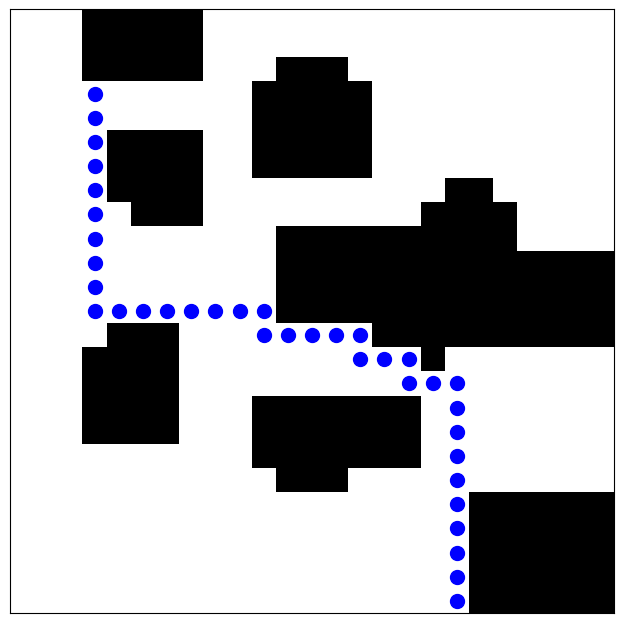

In [6]:
# Cave
start_node =  (3, 3)
end_node = (24, 18)


# Maze
#start_node =  (1, 1)
#end_node = (20, 41)


fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Mapa
obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0,map_dims[0]))

# Caminho
path = nx.shortest_path(G, source=start_node, target=end_node)
print(path)
nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=100, node_color='b')

In [7]:
def getPosFromSceneToMap(scene_pos, map_dims,cell_dim):
    return (int(scene_pos[0])+map_dims[0]/2, int(scene_pos[1])+map_dims[1]/2)

def getPosFromMapToScene(map_pos, map_dims, cell_dim):
    return (map_pos[0]-map_dims[0]/2, map_pos[1]-map_dims[1]/2)   

In [12]:
####################################################################################
#                                                                                  #
#                 LEMBRE-SE QUE A SIMULAÇÃO DEVE ESTAR EM EXECUÇÃO!                #
#                                                                                  #
####################################################################################

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')

    robotname = 'robotino'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait) 
    returnCode, refHandle = sim.simxGetObjectHandle(clientID, "ReferenceFrame0", sim.simx_opmode_oneshot_wait)
    returnCode, goalHandle = sim.simxGetObjectHandle(clientID, "Goal", sim.simx_opmode_oneshot_wait)
                 
    returnCode, wheel1 = sim.simxGetObjectHandle(clientID, 'wheel0_joint', sim.simx_opmode_oneshot_wait)
    returnCode, wheel2 = sim.simxGetObjectHandle(clientID, 'wheel1_joint', sim.simx_opmode_oneshot_wait)
    returnCode, wheel3 = sim.simxGetObjectHandle(clientID, 'wheel2_joint', sim.simx_opmode_oneshot_wait)
    
    returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, refHandle, sim.simx_opmode_oneshot_wait)
    returnCode, ori = sim.simxGetObjectOrientation(clientID, robotHandle, refHandle, sim.simx_opmode_oneshot_wait)
    qstart = np.array([pos[0], pos[1], ori[2]])
               
    # Robotino
    L = 0.135   # Metros
    r = 0.040   # Metros
               
    # Cinemática Direta
    Mdir = np.array([[-r/np.sqrt(3), 0, r/np.sqrt(3)], [r/3, (-2*r)/3, r/3], [r/(3*L), r/(3*L), r/(3*L)]])
           
    # Goal configuration (x, y, theta)    
    returnCode, pos = sim.simxGetObjectPosition(clientID, goalHandle, refHandle, sim.simx_opmode_oneshot_wait)
    returnCode, ori = sim.simxGetObjectOrientation(clientID, goalHandle, refHandle, sim.simx_opmode_oneshot_wait)
    goal_angle = np.arctan2(pos[1]-qstart[1], pos[0] - qstart[0])
    qgoal = np.array([pos[0], pos[1], goal_angle])
    

    gain = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])
#     gain = np.array([[0.3, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])
    
    ############
    # Finalmente podemos determinar o menor caminho entre duas células
    # ATENÇÃO para o Sistema de Coordenadas -- relação Índice do grid e Posição no mundo

    # Cave
#     start_node =  getPosFromSceneToMap(qstart[0:2])
#     end_node = getPosFromSceneToMap(qgoal[0:2])
    start_node =  (int(qstart[0]/cell_size), int(qstart[1]/cell_size))
    end_node = (int(qgoal[0]/cell_size), int(qgoal[1]/cell_size))
    
    path_robot = []
    
    #fig = plt.figure(figsize=(8,8), dpi=100)
    #ax = fig.add_subplot(111, aspect='equal')

    # Mapa
    #obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0,map_dims[0]))

    # Caminho
    path = nx.shortest_path(G, source=start_node, target=end_node)
    #nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=100, node_color='b')
    
    if path == None:
        print("No path found!")
    ############
    
    finito = False
    # iterate over all the pos in the path found
    for i in range(len(path)):
        if finito and i == len(path)-1:
            break
        finito = False
        elem = path[i]
        qgoal = np.array([elem[0]*cell_size, elem[1]*cell_size, np.deg2rad(90)])
        path_robot.append([qgoal[0], qgoal[1]])
        while True:

            returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, refHandle, sim.simx_opmode_oneshot_wait)
            returnCode, ori = sim.simxGetObjectOrientation(clientID, robotHandle, refHandle, sim.simx_opmode_oneshot_wait)
            q = np.array([pos[0], pos[1], ori[2]])
        
            error = qgoal - q
        
            # Margem aceitável de distância
            if (np.linalg.norm(error[:2]) < 0.5):
                finito = True
                break

            # Controller
            qdot = gain @ error

            # Cinemática Inversa
            # w1, w2, w3
            Minv = np.linalg.inv(Rz(q[2]) @ Mdir)
            u = Minv @ qdot

            # Enviando velocidades
            sim.simxSetJointTargetVelocity(clientID, wheel1, u[0], sim.simx_opmode_streaming)
            sim.simxSetJointTargetVelocity(clientID, wheel2, u[1], sim.simx_opmode_streaming)
            sim.simxSetJointTargetVelocity(clientID, wheel3, u[2], sim.simx_opmode_streaming)          
               
    sim.simxSetJointTargetVelocity(clientID, wheel1, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, wheel2, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, wheel3, 0, sim.simx_opmode_oneshot_wait)
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

Program started
Connected to remote API server
Program ended


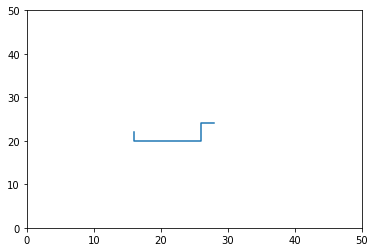

In [13]:
# print(path)
x_val = [x[0] for x in path_robot]
y_val = [x[1] for x in path_robot]

plt.plot(x_val,y_val)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()